<h1 align="center"> ФМИ. Disbalanced dataset.  Part 2 </h1>
<h1 align="center"> Credit card Fraud Detector </h1>


<h2> Введение </h2>

На данном семинаре мы будем реализовывать различные прогностические модели, чтобы проверить, насколько точно они определяют, является ли транзакция обычным платежом (non Fraud) или мошенничеством (Fraud).

<h4> По мотивам кейса, рассмотренного в Зимней школе СберУнивера </h4>

<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные.</li>
<li> Решить проблему сильного дисбаланса классов.  </li>
<li>Построить модели на основе классических алгоритмов машинного обучения. </li>
<li> Провести сравнительный анализ классических подходов.</li>

## Описание данных и постановка задачи:
**Задача:** см ФМИ. Disbalanced dataset.Part 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

Загружаем данные.

In [52]:
# Будем загружать данные, полученные в предыдущем блокноте.
# См обновленный блокнот

new_df = pd.read_csv('/content/sample_data/encoded_mountains_vs_beaches_preferences_short.csv')
new_df.head()

,Unnamed: 0,Gender,Education_Level,Location,Proximity_to_Beaches,Favorite_Season,Environmental_Concerns,Class
0,0,3,2,1,291,3,1,1
1,1,1,1,3,228,1,0,0
2,2,2,3,2,293,3,1,1
3,3,3,4,2,128,2,0,1
4,4,2,3,2,279,2,1,0


In [53]:
# Удаляем первый столбец по его названию
new_df = new_df.drop(columns=['Unnamed: 0'])

# Проверяем результат
print(new_df.head())


   Gender  Education_Level  Location  Proximity_to_Beaches  Favorite_Season  \
0       3                2         1                   291                3   
1       1                1         3                   228                1   
2       2                3         2                   293                3   
3       3                4         2                   128                2   
4       2                3         2                   279                2   

   Environmental_Concerns  Class  
0                       1      1  
1                       0      0  
2                       1      1  
3                       0      1  
4                       1      0  


In [54]:
new_df.describe()

,Gender,Education_Level,Location,Proximity_to_Beaches,Favorite_Season,Environmental_Concerns,Class
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.000833,2.487333,2.003500,166.499167,2.513667,0.502833,0.500000
std,0.813599,1.118950,0.818087,84.319369,1.123695,0.500034,0.500042
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,99.000000,2.000000,0.000000,0.000000
50%,2.000000,2.500000,2.000000,173.000000,3.000000,1.000000,0.500000
75%,3.000000,3.000000,3.000000,240.000000,4.000000,1.000000,1.000000
max,3.000000,4.000000,3.000000,299.000000,4.000000,1.000000,1.000000


In [50]:
df = pd.read_csv('/content/sample_data/encoded_mountains_vs_beaches_preferences.csv')
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Class
0,56,1,71477,1,9,1,2477,1,175,267,1,0,1,1
1,69,1,88740,2,1,2,4777,2,228,190,2,0,1,0
2,46,2,46562,2,0,1,1469,1,71,280,3,0,0,1
3,32,3,99044,3,6,3,1482,3,31,255,1,1,0,1
4,60,2,106583,3,5,4,516,2,23,151,3,1,1,0


In [51]:
df.describe()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Class
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,1.995462,70017.271280,2.505892,4.489265,2.502956,2741.799062,1.999790,149.943502,149.888452,2.488521,0.500858,0.498436,0.250706
std,14.985597,0.814660,28847.560428,1.121401,2.876130,1.120868,1296.922423,0.816251,86.548644,86.469248,1.118548,0.500004,0.500002,0.433423
min,18.000000,1.000000,20001.000000,1.000000,0.000000,1.000000,500.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,31.000000,1.000000,45048.250000,1.000000,2.000000,1.000000,1622.000000,1.000000,75.000000,75.750000,1.000000,0.000000,0.000000,0.000000
50%,43.000000,2.000000,70167.000000,3.000000,4.000000,3.000000,2733.000000,2.000000,150.000000,150.000000,2.000000,1.000000,0.000000,0.000000
75%,56.000000,3.000000,95108.500000,4.000000,7.000000,4.000000,3869.000000,3.000000,225.000000,225.000000,3.000000,1.000000,1.000000,1.000000
max,69.000000,3.000000,119999.000000,4.000000,9.000000,4.000000,4999.000000,3.000000,299.000000,299.000000,4.000000,1.000000,1.000000,1.000000


<h3 style="text-align: center;">Материалы для изучения scikit-learn:<b></b></h3>

*1) Официальный сайт с подробными описаниями моделей и методов : https://scikit-learn.org/stable/user_guide.html*

*2) Полезный репозиторий с блокнотами: https://github.com/gmonce/scikit-learn-book*

*3) Хороший курс с упражнениями: https://inria.github.io/scikit-learn-mooc/*

In [58]:
'''
Работаем с маленьким датасетом new_df
Делаем из него 2 набора.
В первом - все столбцы, но нет целевой переменной.
Во втором - столбец с целевой переменной.
'''


X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Разделяем данные
X = new_df.drop('Class', axis=1)
y = new_df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Создаем объект RobustScaler
rob_scaler = RobustScaler()

# Масштабируем все столбцы кроме 'Class'
for column in X.columns:
    # Fit на тренировочных данных и трансформация
    original_Xtrain[column] = rob_scaler.fit_transform(original_Xtrain[[column]])
    original_Xtest[column] = rob_scaler.transform(original_Xtest[[column]])

# Преобразуем в numpy массивы, если нужно
X_train = original_Xtrain.values
X_test = original_Xtest.values
y_train = original_ytrain.values
y_test = original_ytest.values


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Выберем несколько простых моделей из библиотеки sklearn

classifiers = {
    "LogisiticRegression": LogisticRegression(),  # Логистическая регрессия
    "Support Vector Classifier": SVC(),  # Метод опорных векторов
    "KNearest": KNeighborsClassifier(),# Метод ближайших соседей
    "DecisionTreeClassifier": DecisionTreeClassifier() # Решающее дерево
}

Для борьбы с переобучением будем использовать кросс-валидацию.

<img src="https://scikit-learn.ru/wp-content/uploads/2021/10/image-161.png" width=800>

Разобьем обучающую выборку на 5 фолдов и обучим наши модели.

In [61]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  LogisticRegression получила на обучающей выборке 66.0 % accuracy score
Модель  SVC получила на обучающей выборке 66.0 % accuracy score
Модель  KNeighborsClassifier получила на обучающей выборке 59.0 % accuracy score
Модель  DecisionTreeClassifier получила на обучающей выборке 56.00000000000001 % accuracy score


Для улучшения качества моделей переберем по сетке различные гиперпараметры методом GridSearchCV.


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Логистическая регрессия
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}

grid_log_reg = RandomizedSearchCV(LogisticRegression(solver='liblinear'),
                                  log_reg_params,
                                  cv=3,
                                  n_jobs=-1,
                                  random_state=42)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# Метод ближайших соседей
knears_params = {"n_neighbors": list(range(2, 6)),
                 'algorithm': ['auto', 'ball_tree']}

grid_knears = RandomizedSearchCV(KNeighborsClassifier(),
                                 knears_params,
                                 cv=3,
                                 n_jobs=-1,
                                 random_state=42)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Метод опорных векторов
svc_params = [
    {'C': [1.0, 10.0], 'kernel': ['rbf'], 'gamma': [0.1, 0.5]},
    {'C': [1.0, 10.0], 'kernel': ['poly'], 'degree': [2, 3]}
]

grid_svc = RandomizedSearchCV(SVC(),
                              svc_params,
                              scoring='accuracy',
                              cv=3,
                              n_jobs=-1,
                              random_state=42)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# Решающее дерево
tree_params = {"criterion": ["gini", "entropy"],
               "max_depth": list(range(2, 6)),
               "min_samples_leaf": list(range(5, 6))}

grid_tree = RandomizedSearchCV(DecisionTreeClassifier(),
                               tree_params,
                               cv=3,
                               n_jobs=-1,
                               random_state=42)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_


In [63]:
# Проверим, как поменялись метрики

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  65.69%
Knears Neighbors Cross Validation Score 59.23%
Support Vector Classifier Cross Validation Score 65.94%
DecisionTree Classifier Cross Validation Score 65.67%


Видим явное улучшение!

Давайте теперь попробуем более умные способы undersampling. Например, с помощью NearMiss, который оценивает среднее расстояние между классами. Поможет нам в этом специальная библиотека для работы с несбалансированными даннными imblearn.

In [64]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

undersample_X = new_df.drop('Class', axis=1)
undersample_y = new_df['Class']

undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest = train_test_split(undersample_X, undersample_y,
                                                                                                test_size = 0.2,
                                                                                                random_state=42,
                                                                                                stratify = undersample_y)#


undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Метод NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss распределение классов: {}'.format(Counter(y_nearmiss)))
# Использовать сэмплирование будем во время кросс-валидации

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)#
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])#
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])#

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],
                                                           undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

NearMiss распределение классов: Counter({0: 3000, 1: 3000})


Построим кривую обучение каждой из модели. Данная кривая показывает различие между метриками во время обычного обучения и во время кросс-валидации.

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

In [66]:
def plot_learning_curves(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # Первая модель
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)#
    train_scores_mean = np.mean(train_scores, axis=1)#
    train_scores_std = np.std(train_scores, axis=1)#
    test_scores_mean = np.mean(test_scores, axis=1)#
    test_scores_std = np.std(test_scores, axis=1)#
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Размер выборки')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Вторая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Размер выборки')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")


    # Третья модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Размер выборки')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")


    # Четвертая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Размер выборки')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

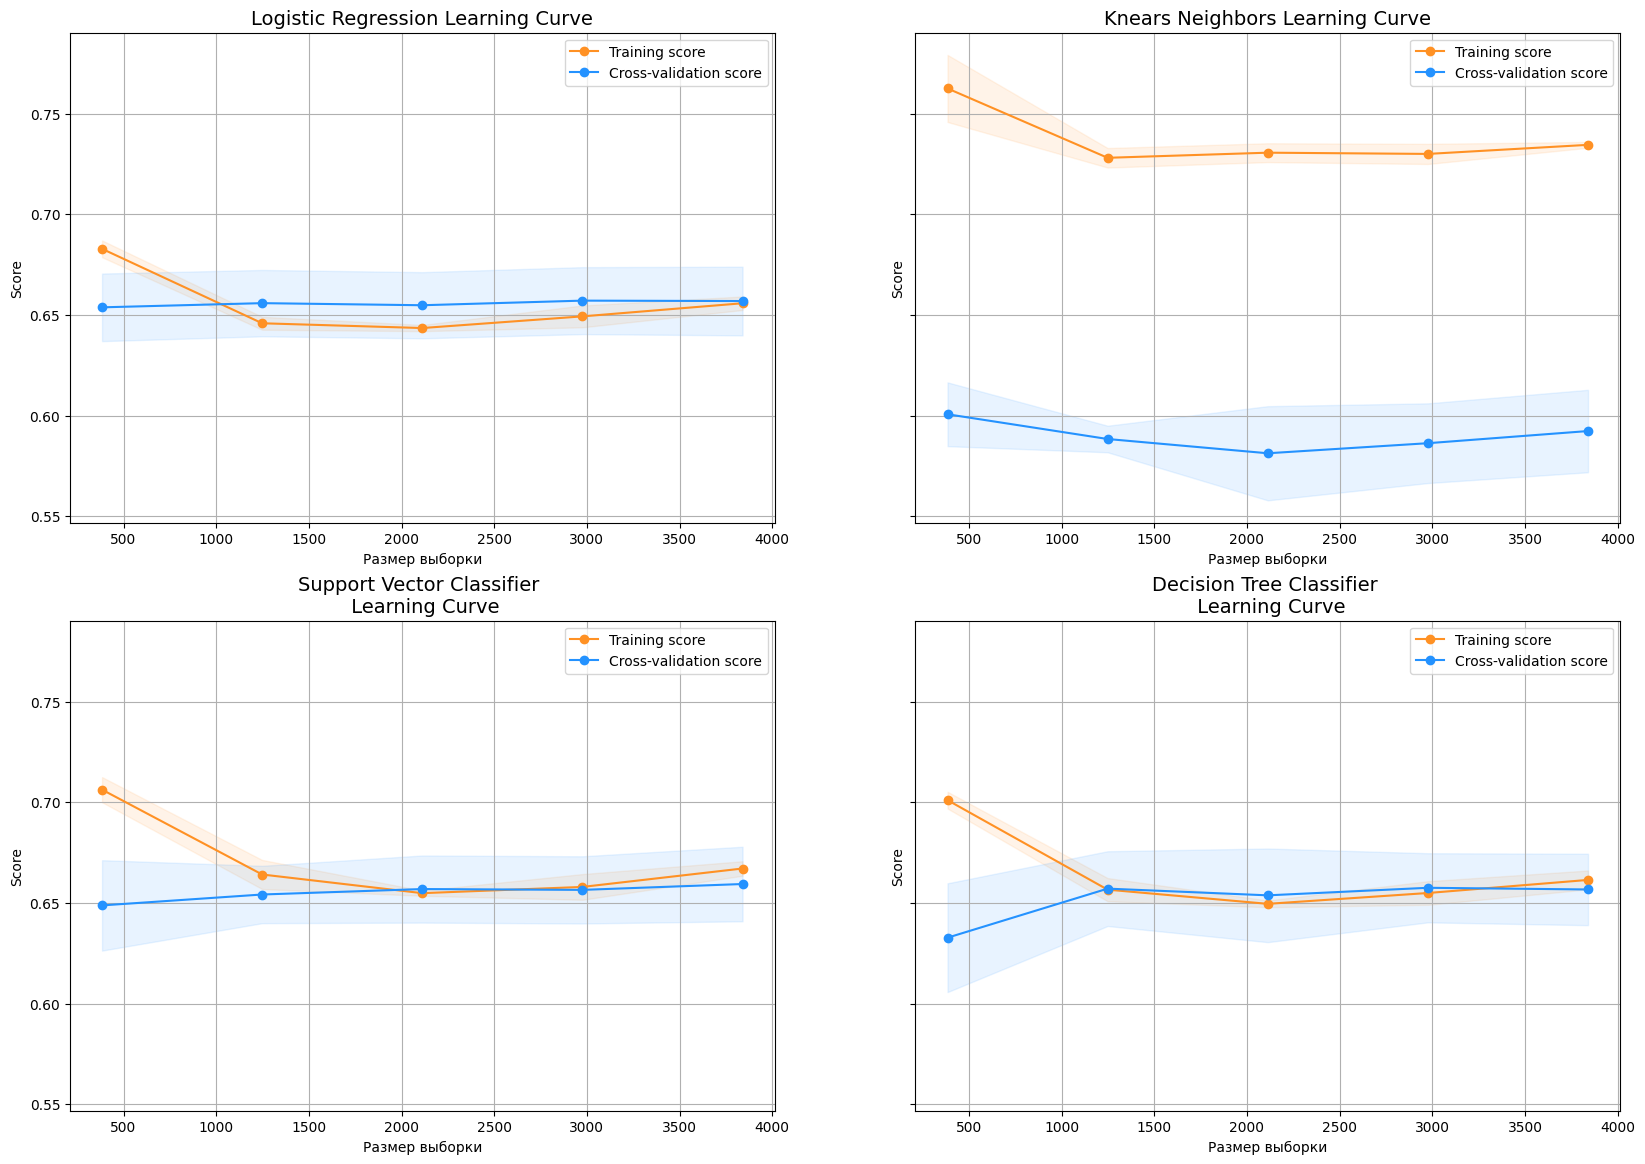

In [22]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curves(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train)

## Кривые обучения:
<ul>
<li>Чем больше разрыв между результатами обучения и результатами кросс-валидации, тем больше вероятность того, что модель переобучилась (большой разброс).</li>
<li> Если результаты низкие как на обучающем, так и на кросс-валидационном наборе, это указывает на то, что наша модель недообучилась (большое смещение).</li>
<li>Логистическая регрессия показала себя лучше остальных.</li>
</ul>

In [67]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [68]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.7105999613875751
KNears Neighbors:  0.5923567885296097
Support Vector Classifier:  0.6987073692090912
Decision Tree Classifier:  0.6569977033940739


Построим roc-кривую и посчитаем площадь под ней.

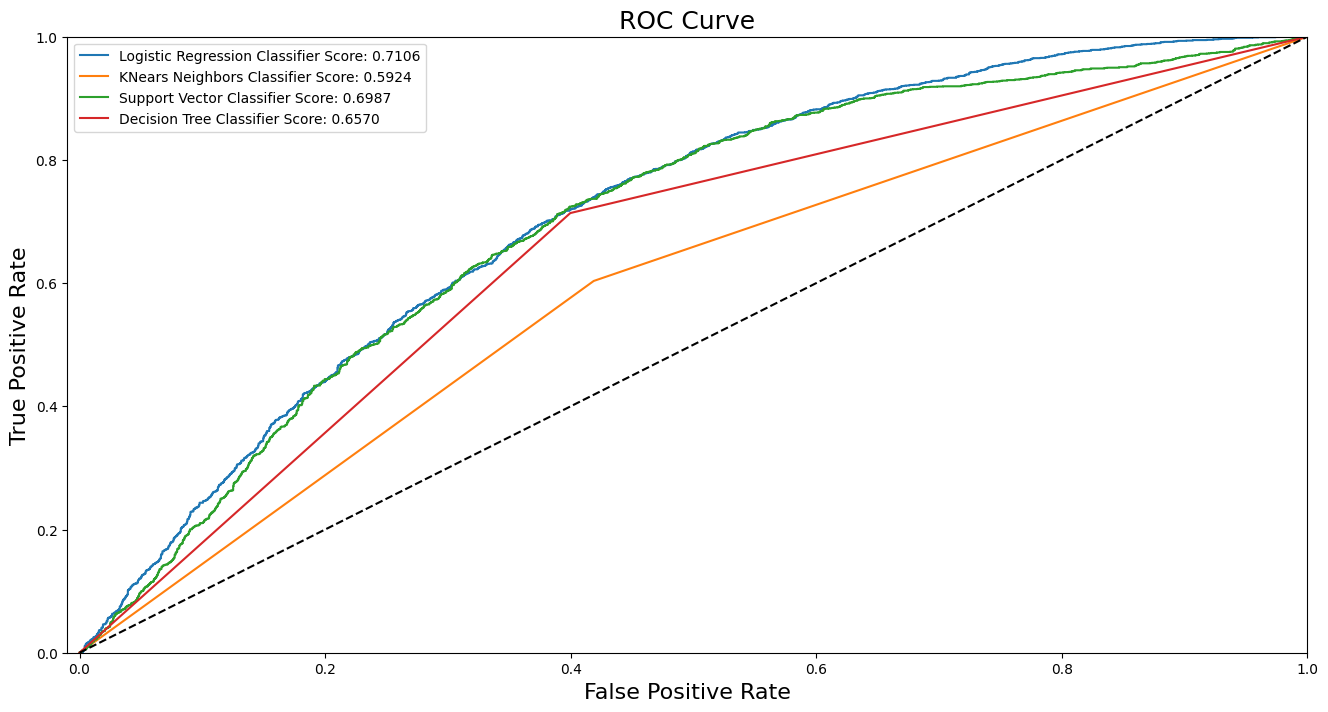

In [69]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)#
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)#
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)#
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)#


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

### SMOTE метод (Over-Sampling):

<b>SMOTE</b> означает Synthetic Minority Over-sampling Technique.  В отличие от Random Under-Sampling, SMOTE создает новые синтетические точки для того, чтобы создать баланс классов. Это еще одна альтернатива для решения проблемы дисбаланса классов. <br><br>


<b> Принцип работы SMOTE: </b>
<ul>
<li><b>Генерация синтетических точек: </b> SMOTE выбирает расстояние между ближайшими соседями меньшего класса и между ними создает синтетические точки. </li>
<li> <b>Преимущество:  </b> Сохраняется больше информации, поскольку нам не пришлось удалять данные, в отличие от under-sampling.</li>
</ul>

### Правильное использование SMOTE
Если мы создадим синтетические точки перед кросс-валидацией, мы окажем определенное влияние на тестовое выборку. Но тестовая выборка не должна быть тронута! По этой причине мы должны создавать синтетические точки данных во время кросс-валидации, а не до нее.

Попробуем в качестве алгоритм подбора гиперпараметров случайный поиск. Он работает быстрее, чем поиск по сетке.

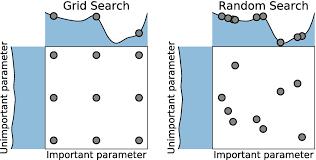

In [81]:
# Берем кусок кода из предыдущего блокнота



from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = new_df.drop('Class', axis=1)
y = new_df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.50291667 0.49708333]
Тестовый набор: [0.48833333 0.51166667]


In [71]:
# сохраним параметры наших классификаторов, на которых они показали лучших результат с GridSearchCV

#dictionary of classifiers objects which we got in the above cell via GridSearchCV
#with the tuned parameters
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "Knears Neighbors": knears_neighbors,
    # "Support Vector Classifier": svc,
    "DecisionTreeClassifier": tree_clf
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 65.69%
Knears Neighbors Cross Validation Score: 59.23%
DecisionTreeClassifier Cross Validation Score: 65.67%


In [72]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Здесь используется сбалансированный датасет
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# StratifiedKFold для кросс-валидации
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Проверка, нужно ли балансировать классы
if y.value_counts().min() / y.value_counts().max() < 0.9:
    over = SMOTE(sampling_strategy=0.1, k_neighbors=3)
    under = RandomUnderSampler(sampling_strategy=0.7)
else:
    over = None
    under = None

# Итерация через словарь с классификаторами
for key, classifier in tuned_classifiers.items():
    steps = []
    if over: steps.append(('o', over))  # Добавляем SMOTE только если он нужен
    if under: steps.append(('u', under))  # Добавляем UnderSampler только если он нужен
    steps.append(('model', classifier))

    # Создаём pipeline
    FiPipeline = Pipeline(steps=steps)

    try:
        # Кросс-валидация
        scores = cross_val_score(FiPipeline, X, y, cv=sss)

        # Печатаем средний accuracy
        print(f"Classifiers: {key} имеет точность {round(scores.mean() * 100, 2)}%")
    except ValueError as e:
        print(f"Ошибка с {key}: {e}")


Classifiers: LogisiticRegression имеет точность 65.92%
Classifiers: Knears Neighbors имеет точность 61.23%
Classifiers: DecisionTreeClassifier имеет точность 66.43%


In [73]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Разбиение данных
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Проверяем баланс классов
if original_ytrain.value_counts().min() == original_ytrain.value_counts().max():
    print("Классы уже сбалансированы, SMOTE не применяется.")
    model = Pipeline([
        ('classification', LogisticRegression())
    ])
else:
    print("SMOTE будет применён.")
    model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.5, k_neighbors=5)),
        ('classification', LogisticRegression())
    ])

# GridSearch для подбора гиперпараметров SMOTE
param_grid = {'sampling__k_neighbors': list(range(3, 7))} if 'sampling' in model.named_steps else {}
if param_grid:
    SMOTE_KN = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
else:
    SMOTE_KN = model

# Обучение модели
if param_grid:
    SMOTE_KN.fit(original_Xtrain, original_ytrain)
    print("Лучший параметр SMOTE:", SMOTE_KN.best_params_)
    log_reg_score = cross_val_score(SMOTE_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)
else:
    SMOTE_KN.fit(original_Xtrain, original_ytrain)
    log_reg_score = cross_val_score(SMOTE_KN, original_Xtrain, original_ytrain, cv=5)

# Печать результата
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%')


Классы уже сбалансированы, SMOTE не применяется.
Logistic Regression Cross Validation Score: 65.77%


In [74]:
from sklearn.metrics import classification_report

labels = ['Beaches', 'Mountains']

# Проверка, используется ли GridSearchCV
if hasattr(SMOTE_KN, 'best_estimator_'):  # Если это GridSearchCV
    best_est = SMOTE_KN.best_estimator_
else:  # Если это просто Pipeline
    best_est = SMOTE_KN

# Предсказание
smote_prediction = best_est.predict(original_Xtest)

# Печать отчета
print(classification_report(original_ytest, smote_prediction, target_names=labels))


              precision    recall  f1-score   support

     Beaches       0.68      0.62      0.65       600
   Mountains       0.65      0.70      0.68       600

    accuracy                           0.66      1200
   macro avg       0.67      0.66      0.66      1200
weighted avg       0.67      0.66      0.66      1200



In [75]:
y_score = best_est.decision_function(original_Xtest)

In [76]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Применим SMOTE после кросс-валидации
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [77]:
# Обучим логистическую регрессию
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 0.019715547561645508 сек


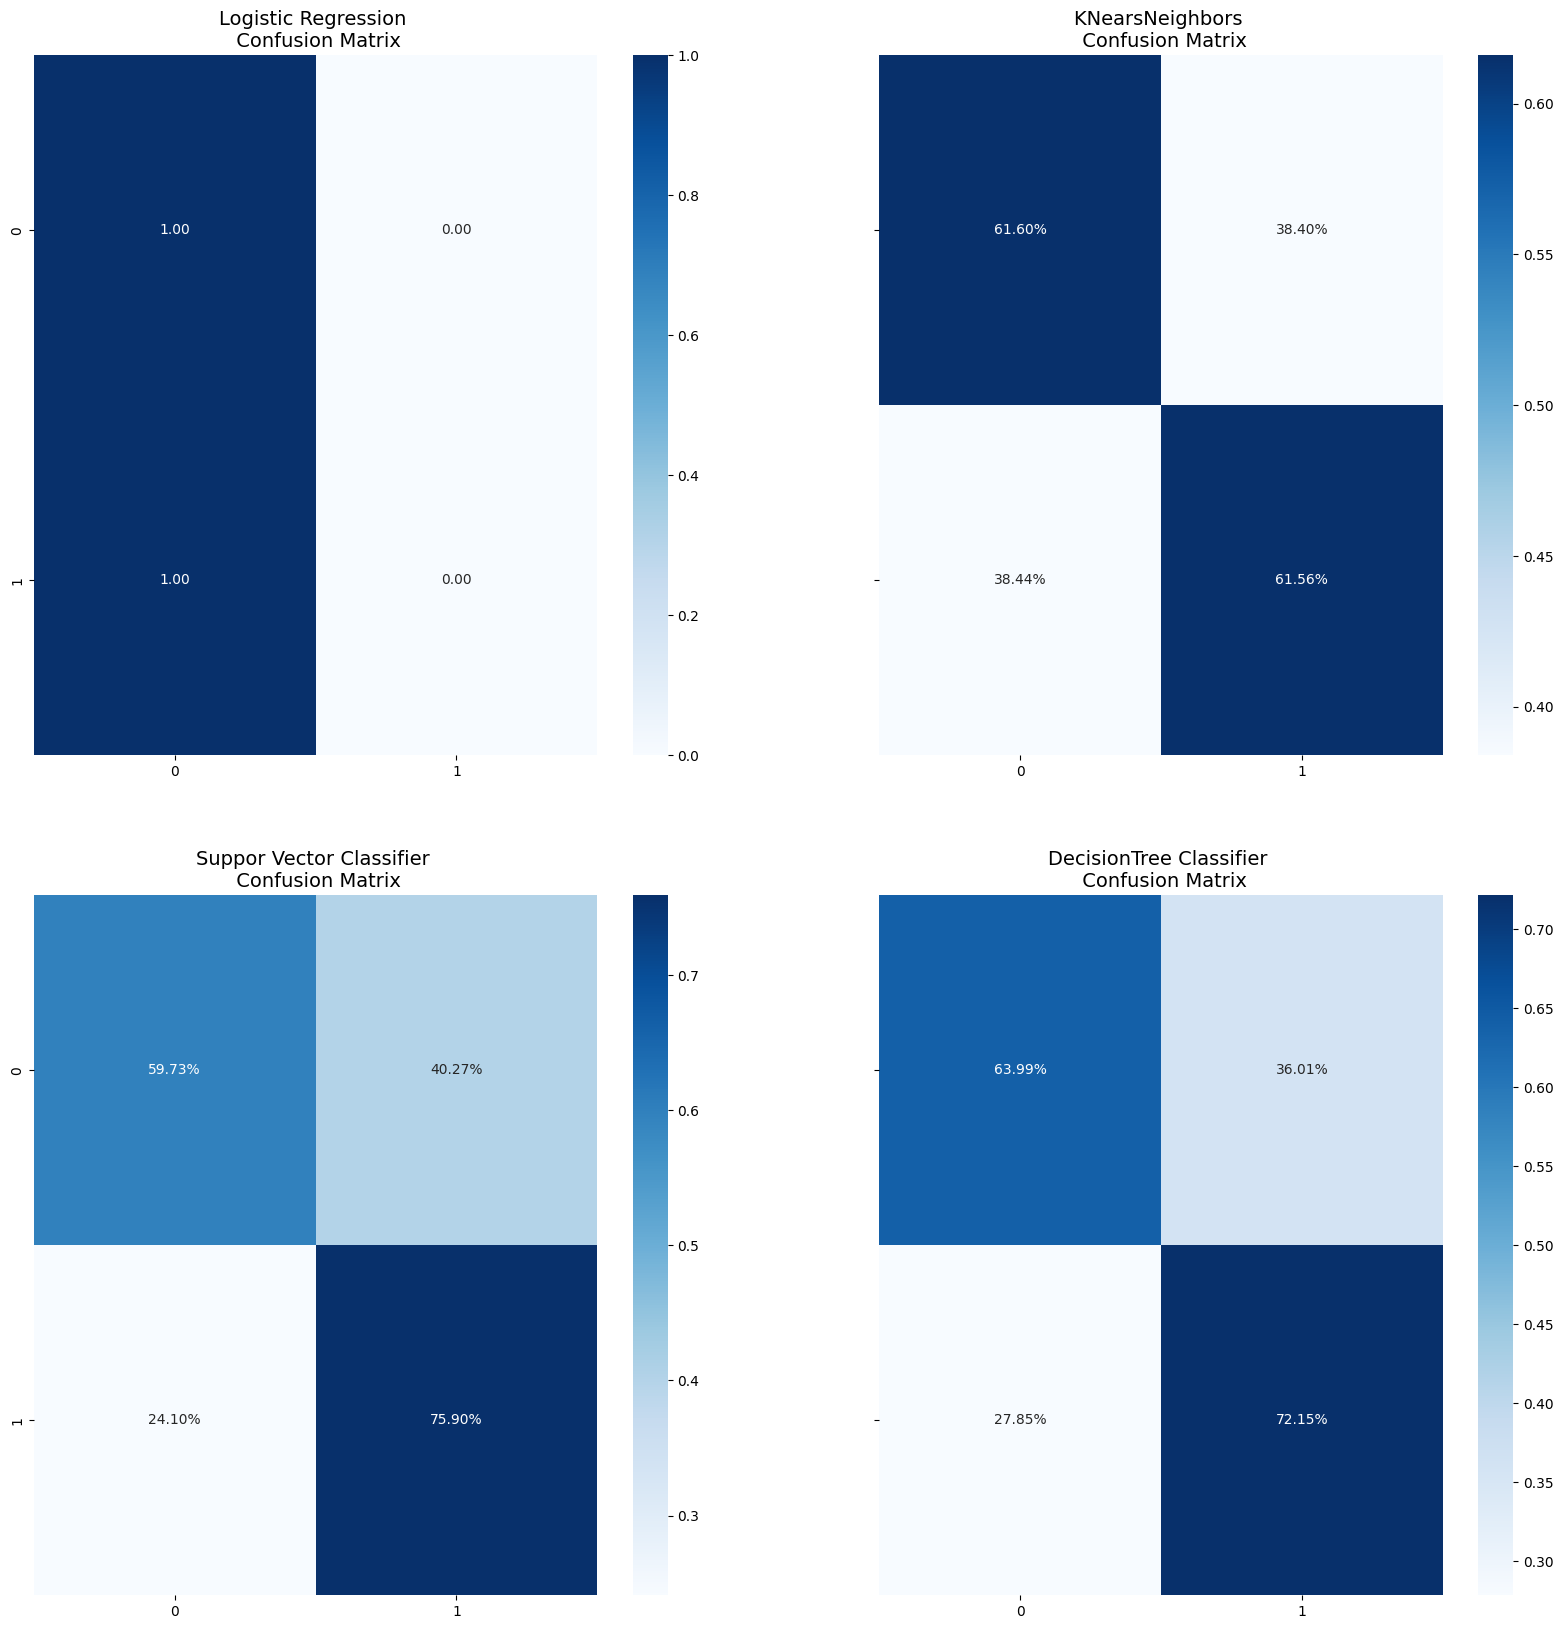

In [78]:
y_pred_log_reg = best_est.predict(X_test)

# Другие модели
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg, normalize='true')
kneighbors_cf = confusion_matrix(y_test, y_pred_knear, normalize='true')
svc_cf = confusion_matrix(y_test, y_pred_svc, normalize='true')
tree_cf = confusion_matrix(y_test, y_pred_tree, normalize='true')

fig,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=log_reg_cf, annot=True, fmt='.2f', cmap='Blues')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax2,data=kneighbors_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)


#
sns.heatmap(ax=ax3, data=svc_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax4, data=tree_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)


plt.show()

Выведем основные метрики моделей.

Давайте вспомним основные метрики качества классификации на примере нашей задачи:

* **Confusion matrix** : так же известна как матрица ошибок, состоит из 4 частей:

    * true positive (TP) : транзакция была мошеннической и модель предсказала ее как мошенническую
    * true negative (TN) : транзакция была нормальной и модель определила ее как нормальную
    * false positive (FP) : транзакция была нормальная, но модель среагировала на нее как на мошенническую
    * false negative (FN) : транзакция была мошенническая, но модель ее пропустила и посчитала нормальной


* **Метрики** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP) (подходит при дисбалансе)
    * Recall : TP / (TP + FN) (подходит при дисбалансе)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall)) (подходит при дисбалансе)

* **Roc-кривая** : ROC-кривая строится путем отрисовки графика зависимости частоты истинных положительных результатов (TPR) от частоты ложных положительных результатов (FPR) при различных пороговых значениях.

In [79]:
from sklearn.metrics import classification_report



print('Logistic Regression:')
#
y_pred=  best_est.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('KNears Neighbors:')
#
y_pred=  knears_neighbors.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Support Vector Classifier:')
#
y_pred=  svc.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Decision Tree Classifier:')
#
y_pred=  tree_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))



Logistic Regression:
              precision    recall  f1-score   support

     Beaches       0.68      0.62      0.65       600
   Mountains       0.65      0.70      0.68       600

    accuracy                           0.66      1200
   macro avg       0.67      0.66      0.66      1200
weighted avg       0.67      0.66      0.66      1200

KNears Neighbors:
              precision    recall  f1-score   support

     Beaches       0.45      0.08      0.13       600
   Mountains       0.50      0.91      0.64       600

    accuracy                           0.49      1200
   macro avg       0.47      0.49      0.39      1200
weighted avg       0.47      0.49      0.39      1200

Support Vector Classifier:
              precision    recall  f1-score   support

     Beaches       0.50      1.00      0.67       600
   Mountains       0.00      0.00      0.00       600

    accuracy                           0.50      1200
   macro avg       0.25      0.50      0.33      1200
weighted

Поскольку мы выбрали Логистическую регрессию в качестве основной модели, давайте сравним ее качество в случае подхода under-sampling и в случае over-sampling.

In [80]:
# Логистическая регрессия с under-sampling
y_pred = log_reg.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Логистическая регрессия с over-sampling
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.661667
1,Oversampling (SMOTE),0.664167


Итак, в данной задаче оптимальным подходом оказался over-samplimg методом SMOTE.